# 신경망 모델 훈련

손실 곡선

In [ ]:
import keras
from sklearn.model_selection import train_test_split
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()
train_scaled = train_input / 255.0
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
def model_fn(a_layer=None):
  model = keras.Sequential()
  model.add(keras.layers.Input(shape=(28,28)))
  model.add(keras.layers.Flatten())
  model.add(keras.layers.Dense(100, activation='relu'))
  if a_layer:
    model.add(a_layer)
  model.add(keras.layers.Dense(10, activation='softmax'))
  return model


In [ ]:
model = model_fn()
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_scaled, train_target, epochs=5, verbose=0)

verbose 매개변수
- 1(기본값): epoch마다 진행 막대와 함꼐 손실 등의 지표를 출력
- 2: 진행 막대를 빼고 출력
- 0: 훈련 과정을 나타내지 않음.

In [ ]:
print(history.history.keys())

dict_keys(['accuracy', 'loss'])


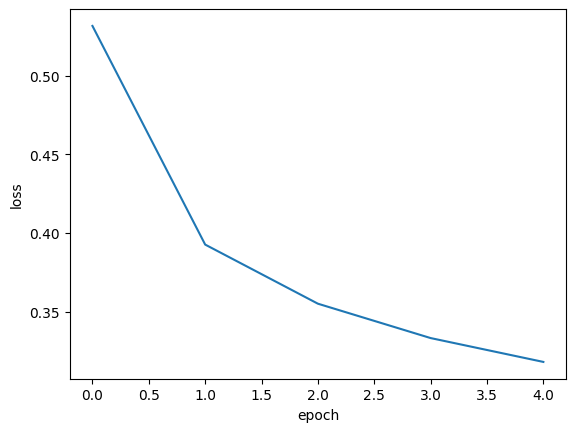

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

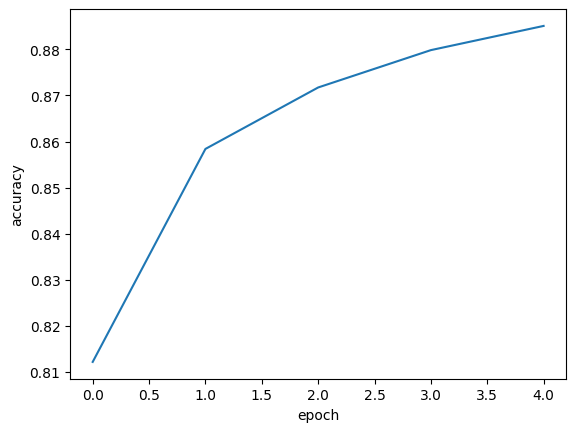

In [ ]:
plt.plot(history.history['accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

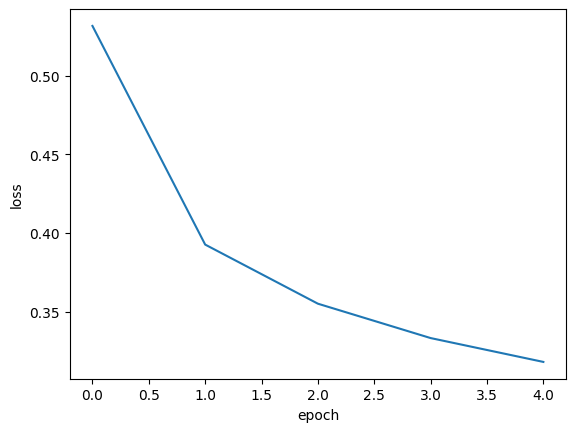

In [ ]:
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])
hsitory = model.fit(train_scaled, train_target, epochs=20, verbose=0)
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

검증 손실

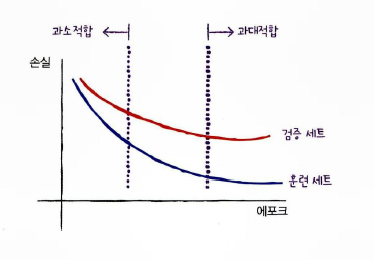

In [ ]:
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target))

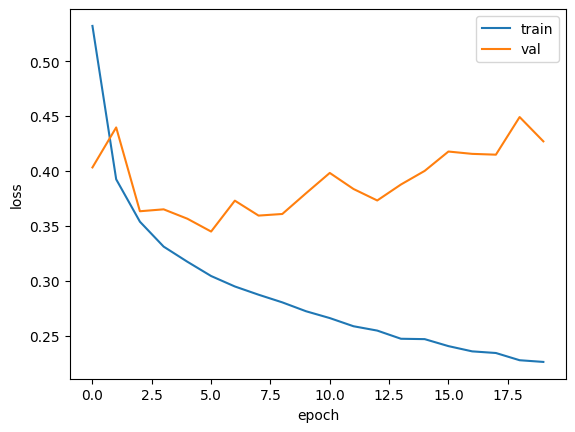

In [ ]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

기본 RMSprop optimizer
Adam optimizer: adaptive learning rate를 사용.

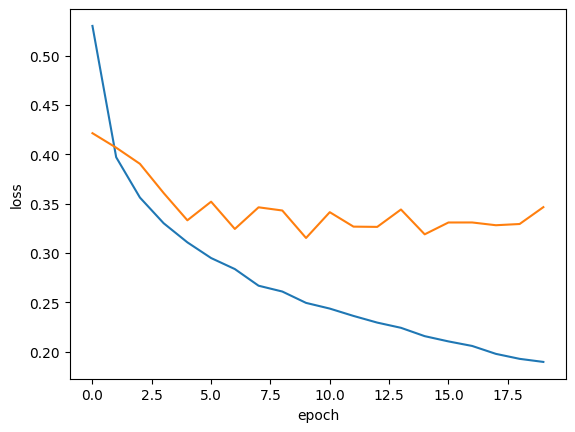

In [ ]:
model = model_fn()
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target))
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend
plt.show()

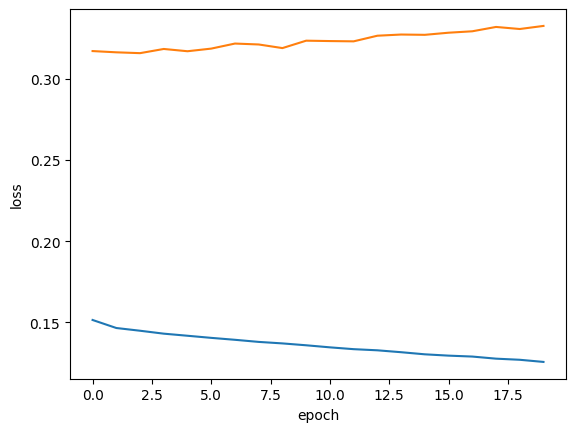

In [ ]:
new_learning_rate=0.0001
adam_optimizer = keras.optimizers.Adam(learning_rate=new_learning_rate)
model.compile(optimizer=adam_optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target))
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend
plt.show()

드롭아웃(dropout)

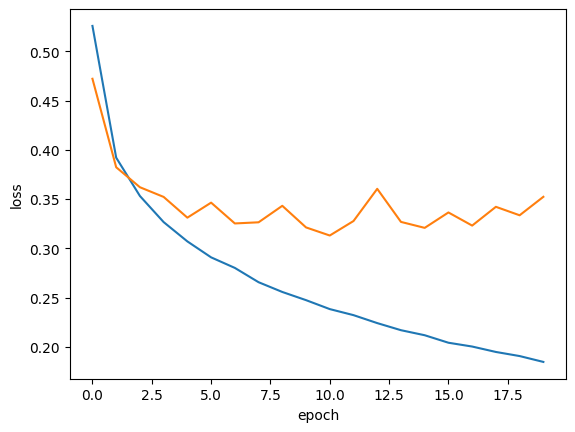

In [ ]:
model = model_fn()
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target))
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend
plt.show()

In [ ]:
model=model_fn(keras.layers.Dropout(0.3))
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_5 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

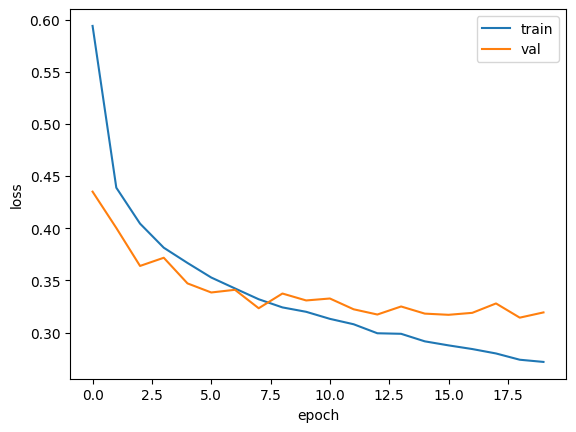

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target))
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

모델 저장과 복원

In [ ]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_scaled, train_target, epochs=11, verbose=0, validation_data=(val_scaled, val_target))

In [ ]:
model.save('model-whole.keras')

In [ ]:
model.save_weights('model.weights.h5')

In [ ]:
!ls -al model*

-rw-r--r-- 1 root root 976600 Dec 17 00:21 model-.weights.h5
-rw-r--r-- 1 root root 335776 Dec 17 00:23 model.weights.h5
-rw-r--r-- 1 root root 979408 Dec 17 00:20 model-whole.keras


1. 훈련을 하지 않은 새로운 모델을 만들고 model.weights.h5 파일에서 훈련된 모델 파라미터를 읽어서 사용

In [ ]:
model = model_fn(keras.layers.Dropout(0.3))
model.load_weights('model-.weights.h5')

In [ ]:
import numpy as np

val_labels = np.argmax(model.predict(val_scaled), axis=-1)
#행별로 label 생성
print(np.mean(val_labels == val_target))

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
0.8839166666666667


In [ ]:
import numpy as np
from tensorflow.keras.models import Model # 필요에 따라 모델 임포트
# 가정: 이미 model 변수에 동일한 구조의 Keras 모델이 정의되어 있어야 합니다.

# --- 파일 경로 정의 ---
GOOD_WEIGHTS_FILE = 'model-.weights.h5' # 정확도 0.8 이상 파일
BAD_WEIGHTS_FILE = 'model.weights.h5'   # 정확도 0.1 이하 파일

# --- 함수 정의: 가중치 로드 및 분석 ---
def analyze_weights(model, file_path):
    """
    지정된 파일에서 가중치를 로드하고 주요 통계 정보를 출력합니다.
    """
    try:
        # 가중치 파일 로드
        model.load_weights(file_path)

        # 가중치 가져오기 (각 레이어별 가중치 배열 리스트)
        weights_list = model.get_weights()

        print(f"\n--- 파일 분석: {file_path} ---")
        print(f"총 레이어 수 (가중치 셋): {len(weights_list)}")

        # 가중치 배열들을 순회하며 분석
        total_sum = 0
        total_std = 0

        for i, weights in enumerate(weights_list):
            # 가중치 배열이 비어있지 않은 경우에만 분석
            if weights.size == 0:
                continue

            weights_sum = np.sum(weights)
            weights_std = np.std(weights)

            # 작은 레이어 정보 출력
            if i < 5: # 처음 5개 레이어만 상세 정보 출력
                print(f"  [Layer {i}] Shape: {weights.shape}, Sum: {weights_sum:.4f}, Std Dev: {weights_std:.4f}")

            total_sum += weights_sum
            total_std += weights_std # (단순 합계이므로 대표성이 떨어질 수 있음)

        print(f"\n* 총 가중치 합계 (Total Sum): {total_sum:.4f}")
        print(f"* 총 가중치 표준편차 (Aggregated Std Dev): {total_std:.4f}")

    except Exception as e:
        print(f"\n!!! {file_path} 로드/분석 중 오류 발생: {e}")


# --- 실행 ---

# 1. 훈련된 가중치 파일 분석 (정확도 0.8+)
analyze_weights(model, GOOD_WEIGHTS_FILE)

# 2. 문제의 가중치 파일 분석 (정확도 0.1-)
analyze_weights(model, BAD_WEIGHTS_FILE)


--- 파일 분석: model-.weights.h5 ---
총 레이어 수 (가중치 셋): 4
  [Layer 0] Shape: (784, 100), Sum: -1171.5236, Std Dev: 0.1573
  [Layer 1] Shape: (100,), Sum: 16.0848, Std Dev: 0.2939
  [Layer 2] Shape: (100, 10), Sum: -135.3394, Std Dev: 0.3447
  [Layer 3] Shape: (10,), Sum: -0.5017, Std Dev: 0.2742

* 총 가중치 합계 (Total Sum): -1291.2798
* 총 가중치 표준편차 (Aggregated Std Dev): 1.0700

--- 파일 분석: model.weights.h5 ---
총 레이어 수 (가중치 셋): 4
  [Layer 0] Shape: (784, 100), Sum: 1.3761, Std Dev: 0.0476
  [Layer 1] Shape: (100,), Sum: 0.0000, Std Dev: 0.0000
  [Layer 2] Shape: (100, 10), Sum: 3.5503, Std Dev: 0.1360
  [Layer 3] Shape: (10,), Sum: 0.0000, Std Dev: 0.0000

* 총 가중치 합계 (Total Sum): 4.9263
* 총 가중치 표준편차 (Aggregated Std Dev): 0.1836


2. model-whole.keras 파일에서 새로운 모델을 만들어 바로 사용

In [ ]:
model = keras.models.load_model('model-whole.keras')
model.evaluate(val_scaled, val_target)

375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8866 - loss: 0.3209


[0.3242175281047821, 0.8839166760444641]

콜백(callback)

In [ ]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best_model.keras', save_best_only=True)
model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target), callbacks=[checkpoint_cb])

In [ ]:
model = keras.models.load_model('best_model.keras')
model.evaluate(val_scaled, val_target)

375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8883 - loss: 0.3185


[0.31927403807640076, 0.8862500190734863]

In [ ]:
model=model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best_model.keras', save_best_only = True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)
history = model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

In [ ]:
print(early_stopping_cb.stopped_epoch)

9


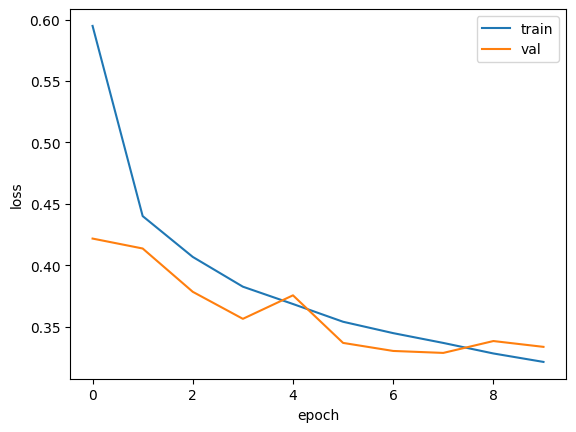

In [ ]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

In [ ]:
model.evaluate(val_scaled, val_target)

375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8859 - loss: 0.3254


[0.328533798456192, 0.8824166655540466]

파이토치로 신경망 모델 훈련하기

In [1]:
from torchvision.datasets import FashionMNIST

fm_train = FashionMNIST(root='.', train=True, download=True)
fm_test = FashionMNIST(root='.', train=False, download=True)

train_input = fm_train.data
train_target = fm_train.targets
train_scaled = train_input / 255.0

from sklearn.model_selection import train_test_split

train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)

100%|██████████| 26.4M/26.4M [00:00<00:00, 113MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 4.11MB/s]
100%|██████████| 4.42M/4.42M [00:00<00:00, 60.0MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 14.0MB/s]


In [2]:
print(train_scaled.shape, train_target.shape)

torch.Size([48000, 28, 28]) torch.Size([48000])


In [3]:
import torch.nn as nn

model = nn.Sequential(
    nn.Flatten(),
    nn.Linear(28*28, 100),
    nn.ReLU(),
    nn.Dropout(0.3),
    nn.Linear(100, 10)
)

import torch

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=784, out_features=100, bias=True)
  (2): ReLU()
  (3): Dropout(p=0.3, inplace=False)
  (4): Linear(in_features=100, out_features=10, bias=True)
)

nn.Sequential(): 파이토치에서 지원하는 모듈로, Container 클래스를 생성함.

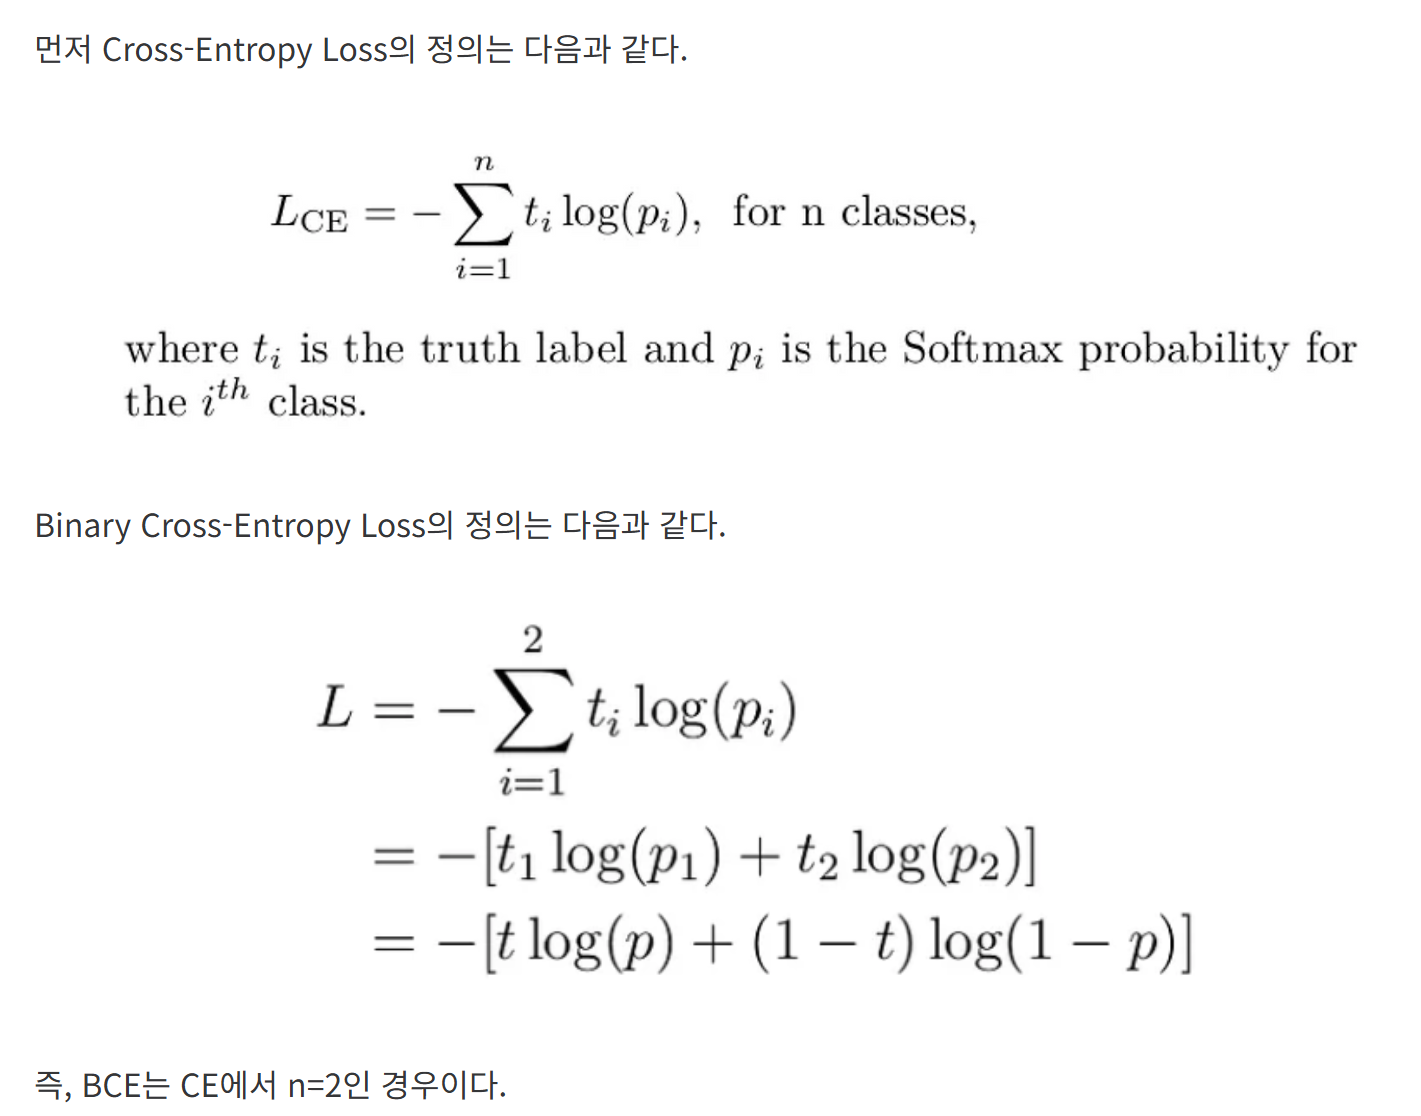

[손실함수_복습]
Cross-Entropy Loss(다중 분류 시)

pi: softmax probility(0~1의 값), 이 샘플이 이 클래스에 속할 확률이 0부터 1의 값으로 표현됨.

ti: truth label(각 샘플이 속하는 클래스를 나타내기 샘플이 속하는 클래스 위치에 1이라는 값으로 label되어 있음 = truth label, 나머지 클래스 위치는 0으로 표시됨, one-hot encoding)

Binary Cross-Entropy Loss

In [10]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters())

In [11]:
train_hist = []
val_hist = []
patience = 2
best_loss = -1
early_stopping_counter = 0

In [12]:
epochs = 20
batches = int(len(train_scaled)/32)
for epoch in range(epochs):
  model.train()
  train_loss = 0
  for i in range(batches):
    inputs = train_scaled[i*32:(i+1)*32].to(device)
    targets = train_target[i*32:(i+1)*32].to(device)
    optimizer.zero_grad()
    #계산기 초기화
    outputs = model(inputs)
    loss = criterion(outputs, targets)
    loss.backward()
    optimizer.step()
    #loss.backward()에서 계산된 기울기 값을 보고 실제로 수정하기.
    train_loss += loss.item()
    #각 미니배치별 손실값을 train_loss에 누적하여 저장(업데이트)
  model.eval()
  val_loss=0
  with torch.no_grad():
    val_scaled = val_scaled.to(device)
    val_target = val_target.to(device)
    outputs = model(val_scaled)
    loss = criterion(outputs, val_target)
    val_loss += loss.item()
    #각 epoch별 손실값을 val_loss에 저장(업데이트)
  train_hist.append(train_loss/batches)
  #한 batch당 평균적으로 발새한 손실을 계산하여 train_hist에 추가.
  val_hist.append(val_loss)
  print(f"에포크:{epoch+1},",f"훈련 손실: {train_loss/batches:.4f}, 검증 손실: {val_loss:.4f}")

  if best_loss == -1 or val_loss < best_loss:
    best_loss = val_loss
    early_stopping_counter = 0
    torch.save(model.state_dict(), 'best_model.pt')
  else:
    early_stopping_counter += 1
    if early_stopping_counter >= patience:
      print(f"{epoch+1}번째 에포크에서 조기 종료 되었습니다.")
      break


에포크:1, 훈련 손실: 0.2251, 검증 손실: 0.3625
에포크:2, 훈련 손실: 0.2208, 검증 손실: 0.3510
에포크:3, 훈련 손실: 0.2187, 검증 손실: 0.3688
에포크:4, 훈련 손실: 0.2191, 검증 손실: 0.3869
4번째 에포크에서 조기 종료 되었습니다.


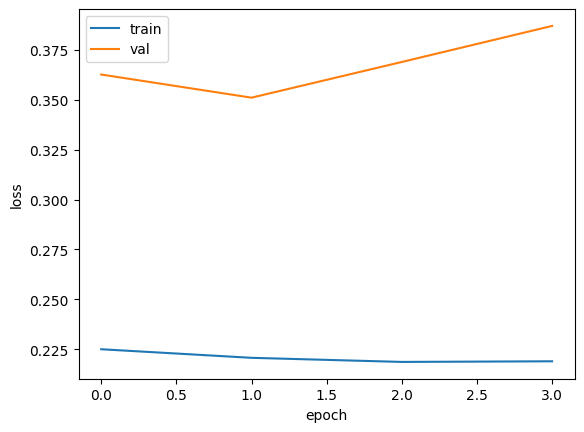

In [13]:
import matplotlib.pyplot as plt

plt.plot(train_hist, label='train')
plt.plot(val_hist, label='val')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

In [14]:
model.load_state_dict(torch.load('best_model.pt', weights_only=True))

model.eval()
with torch.no_grad():
  val_scaled = val_scaled.to(device)
  val_target = val_target.to(device)
  outputs = model(val_scaled)
  predicts = torch.argmax(outputs, 1)
  corrects = (predicts == val_target).sum().item()

accuracy = corrects / len(val_target)
print(f"검증 정확도: {accuracy:.4f}")

검증 정확도: 0.8898
